<font color="#de3023"><h1><b>REMINDER: MAKE A COPY OF THIS NOTEBOOK, DO NOT EDIT</b></h1></font>

# Lab 6: Useful Project Software

For any practical project, you'll end up relying on tools that have been written by other developers that align with your needs. In our case, there are three primary tools we expect you to find *very* useful. This is separate from any specific packages you may find to be interesting and/or useful for your particular data. We expect that most of the projects will fall into one of the following categories:

- Image data analysis
- Text analysis
- Audio analysis

We will walk through these in more specific detail (in terms of architectures and such details) in coming labs, but for now, we expect some grounds of technology to be shared across projects.

## Google Colab
All the code we've been running in the course so far (both in lab and your HWs). For your project, you'll (obviously) need to write a fair bit of code. To do so, we recommend running everything through Colab, since you will avoid all the headaches of managing dependencies and will also get a free GPU to train with. To explain briefly, Colab runs a server on one of Google's machines, which means any code you run on Colab is actually running on one of *their* servers. This is why you've never had to install Tensorflow on your own computers but have been able to use it in all the previous labs and HWs!

This is a *huge* convenience, but it does have a handful of its own pain points. But these are far more manageable than running code on your local computer, so unless you are familiar with Python and comfortable using the Terminal on your local computer, we highly advise using Colab for this project and just working around the few quirks.

For now, don't worry about what exactly this means, but switch the runtime to "GPU" (we'll talk about this much more in a bit).

In [1]:
#############################################################################
# Task
# Switch the Runtime to "GPU" by going to Runtime -> Change runtime type
#############################################################################

### Colab: Getting Started
To actually create a Notebook, go to File -> New Notebook. We're going to do all of the work here, but eventually you'll do it in your own notebook.

Notebooks consist of two types of "cells", which you've seen all along:
- Markdown cells: where you can write "normal" text
- Code cells: where you can write code

"Markdown" is just a "language" for writing documents. It isn't a true "programming language" (it isn't Turing-complete for all your computer scientists out there): it's mostly the same as writing in Word or Google Docs. But there are some small intricacies of formatting, since there is no "Format -> Bold" menu in Markdown. Just some brief examples:

- \* [text] \* is italics
- \** [text] \** is bold
- \#, \##, ... are used for different "levels" of titles

You can just Google search these as they come up, but the main thing to realize is that all your exposition should be written in Markdown in your Colab. Small explanations can go in the code directly as comments, but it is worthwhile having longer explanations here. Let's try an exercise!

In [ ]:
#############################################################################
# Task
# Create a Markdown cell below this and write "My name is ___" (insert your name)
# as a Title and put "My year is ___" (insert your year), italicizing the word "year"
#############################################################################

# My Name is Zack
My year is *Senior*

Great! Now, let's add a code cell: this is what you've primarily been working with for the last several weeks, but given that you haven't written these from scratch, let's go ahead and try this out.

**Task**
Create a Code cell below this and print "Hello World" in that cell

In [2]:
print("Hello World")

Hello World


Great! So we now know about the cell types: we'll now focus largely on some nuances of the code cells that we haven't explicitly taught you (even they were being used in the background). One is dependencies: we saw last week that for domain-specific work, you will likely want to have some dependencies.

Let's take a look at an example of this. The nice thing about Colab is that it comes pre-installed with a bunch of dependencies: this is why we never had to "install" numpy, pandas, or tensorflow. Look:

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

No errors! Normally, if you ran these on a fresh computer, you would have something like "module not found" errors. If you want to use a more esoteric, domain-specific package, however, chances are that Colab *won't* come pre-installed with these dependencies. For example, let's suppose we were working with astronomy images and needed to use the reasonably popular "GalSim" library: http://galsim-developers.github.io/GalSim/_build/html/index.html. If we try importing this, we see:

In [4]:
import galsim

ModuleNotFoundError: ignored

An import error! To solve this, we're going have to go into a *bit* of a digression to talk about the "Terminal"

## Aside: Terminal
The "Terminal" is an application that some of you may have used in your CS classes and others of you may never have heard of or seen. If you're on a Mac, you can simply open up Terminal and see what this looks like. The Terminal is effectively a way to interact with your computer without using the standard GUI interface you see (i.e. no "double clicking" to open applications or folders or "dragging-and-dropping" files into folders). This might sound like a pointless complication (after all, if we have these GUIs, why not use them?) but the benefit is that you have *way* more flexibility to run things that you cannot easily do through simple GUI interfaces. There are also times where you may just not have a GUI interface (if you're working on a remote machine for example), although this is not completely true, since you can run a "windows forwarding" software. 

Anyway, there are a couple commands you should be aware of:
- *ls*: list the current directory contents
- *mkdir [directory_name]*: makes a directory (folder)
- *cd [directory_name]*: moves *into* a directory
- *..*: how you refer to something *up* the directory tree
- *cat [filename]*: dump the content of a file to the screen
- *less [filename]*: same as cat but in a more interactive way

Let's try some basic things out: https://bellard.org/jslinux/vm.html?url=alpine-x86.cfg&mem=192

Getting used to the Terminal is *very* important for practical CS applications, but is not really going to be all that necessary for the class. We just need to know one thing for now: how to install packages.

## Colab: Installing Packages
One thing to know is that, if you start a line in a Colab code cell with `!`, it will execute that command *as a Terminal command*, **not** as Python! Remember: you **don't** run Python code directly in the Terminal (it's run through something called an "interpreter" for people interested), so the stuff you run in Terminal is actually a *completely different* language!

For our purposes, most of this is not too important to understand, but it is useful to get a bit of a feel for this in the few cases you *do* need to run Terminal commands:

In [ ]:
#############################################################################
# Task
# Create a directory called "test" and jump inside that directory in a separate code cell
#############################################################################

In [6]:
! mkdir test
! ls
! cd test

mkdir: cannot create directory ‘test’: File exists
sample_data  test


In [8]:
! ls

sample_data  test


One point to note is that each line is executed *separately*, so if you `cd` into a directory, the next line will **not** be inside that directory. You can string commands together with `&&`, but you likely will not have to do this for any of the Terminal commands you'll be using.

Back to installing though, the main two ways of installing dependencies for Python are `conda` and `pip`. `conda` slightly preferred if you're doing development locally (outside of Colab), but for Colab, you have to use `pip`. So, guess our hand is forced! `pip` is a *Terminal command*, so you'll have to use the stuff we just learned to run it for installing dependencies. 

So, let's try using `pip` to install `galsim`. **Almost always**, the `pip` command to install a package `x` will just be `pip install x`. There are occasional deviations from this, but that's a good rule of thumb. If you're unsure, you can always check out the GitHub repo (we'll talk about GitHub in just a moment) or their documentation page.

In [10]:
#############################################################################
# Task
# Install galsim and create a new code cell to check you can now import it without error
#############################################################################
! pip install galsim
import galsim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Great! As you get going on your projects, chances are you'll end up across these packages you'll want to use, so getting comfortable with finding the documentation that shows the `pip` install steps is very useful. Let's try one more example

In [11]:
#############################################################################
# Task
# Install and import the package documented in https://scanpy.readthedocs.io/en/stable/
#############################################################################
! pip install scanpy
import scanpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 33.5 MB/s 
     |████████████████████████████████| 96 kB 5.2 MB/s 
     |████████████████████████████████| 88 kB 9.1 MB/s 
     |████████████████████████████████| 11.2 MB 55.9 MB/s 
     |████████████████████████████████| 960 kB 57.9 MB/s 
     |████████████████████████████████| 1.1 MB 65.9 MB/s 
     |████████████████████████████████| 63 kB 2.6 MB/s 
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82829 sha256=d7a2827b85011757d795f9f140cf1c91c45fc85c5845e80843a7c3e61111df9a
  Stored in directory: /root/.cache/pip/wheels/b3/52/a5/1fd9e3e76a7ab34f134c07469cd6f16e27ef3a37aeff1fe821
  Created wheel for pynndescent: filename=pynndescent-0.5.7-py3-none-any.whl size=54286 sha256=7b6b233d87c14b24d901ad05d57dbb65c0dc3588fcaf6120b9bcab004bcd1bbb
  Stored in directory: /root/.cache/pip/wheels/7f/2a/f8/7bd5dcec71bd5c669f6

Great! We now have our bases covered on the dependency front. Next thing to talk about: basic computer hardware.

## Colab: Hardware
Even though you interact with Colab through the browser, remember that the code is being run on one of **Google's machines**, which means the hardware the code is running on is *totally* different from what's in your laptop. Let's do a whirlwind tour through computer hardware:

- **CPU**: "central command" of the computer -- this is the part that issues commands to the various other components of a computer (disk/RAM/GPU/DSP...). Much of the communications between parts of the computer require the CPU to act as a coordinator. CPUs are excellent at performing long-serieses of complicated commands and can run parallel code if they are multi-core (although doing the latter with Vanilla Python isn't possible)
- **GPU**: "graphics" unit of the computer -- this used to be just the part that was responsible for rendering things to your monitor. But it turns out the underlying ability that enables this rendering is pretty extensible to other tasks as well, specifically doing many, *many* matrix multiplies in parallel. This is why GPUs are preferred for training and running neural networks
- **TPU**: "tensor" unit -- this is a very recent addition to the computer HW family. GPUs are still heavily used for a variety of tasks (still being responsible for rendering objects to screen, which is most heavily used in things like video games), so they aren't *specifically* made for deep learning. They just happen to be a pretty decent fit. TPUs were built for the *sole* purpose of accelerating ML training, so they are much more finely tuned to this use case

That being said, there is one new Terminal command you should keep in mind for this: `nvidia-smi`. This shows you:

1. If you have a/multiple GPUs on your computer and
2. How much those GPUs are being used

Let's see how this looks in practice! First, switch your runtime to a **CPU** instance, to compare outputs. One thing before moving on, let's retry importing `galsim`. You know, just to make sure it still works

In [13]:
import galsim

Oh no! What happened? Didn't we already install it?

Well, not quite. By switching the "Runtime," we've actually been moved to a different machine! This means *all* of the stuff we ran (both in Python and the Terminal) has been totally wiped. The *code* is still all there, but we just have to re-run it to replicate what happened. This is *exactly* the same thing that happens when you "refresh" the page. The only change is that, in this case, the computer we've moved to has different HW specs than the original one, since we now have a CPU computer. Let's now return to the GPU specific discussion.

In [14]:
#############################################################################
# Task
# Check what nvidia-smi produces on a CPU-only computer
#############################################################################
! nvidia-smi

Thu Oct  6 18:52:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Alright, that's pretty obscure! We're not going to get into the details of what exactly "drivers" are or anything like that here, but just realize that all this is saying is that the command hasn't found any GPUs to communicate to. We can also check this directly with tensorflow.

In [15]:
#############################################################################
# Task
# Use https://www.tensorflow.org/api_docs/python/tf/test/is_gpu_available to
# confirm there is no GPU available on the current computer
#############################################################################
import tensorflow as tf
tf.test.is_gpu_available()

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

Now that we have confirmed this is not the case, let's switch the runtime and make sure the output changes. Go ahead and switch back to a GPU runtime.

Now let's repeat both of the above exercises

In [ ]:
#############################################################################
# Task
# Check what nvidia-smi produces on a GPU-enabled computer
#############################################################################

# See Above

In [ ]:
#############################################################################
# Task
# Use https://www.tensorflow.org/api_docs/python/tf/test/is_gpu_available to
# confirm there is a GPU available on the current computer
#############################################################################

# See Above

Great! The nice thing about Tensorflow is that, if a GPU is available, it will automatically run your code on the GPU. This is an extremely complicate process under the hood, but for your purposes, there are 0 things that change about *your* code! In fact, you likely have (maybe even accidentally) been training with GPUs in the last couple weeks. For your HWs, training on a CPU would have been totally fine, but you will likely have a large model for your project, which could take much longer to run without access to a GPU. It is also important to realize that changing to a GPU does **not** change the results or functionality: it *only* makes the steps faster, since more matrix multiplies can be computer in parallel.

Note: `nvidia-smi` will actually also fail on a TPU machine, since Nvidia doesn't make TPUs. But your code should train equally as fast (or faster) on TPU instances.

## Aside: GitHub
For anyone who hasn't heard of GitHub, it is an *extremely* commonly used tool in the space of software engineering. GitHub effectively serves as the "Google Drive" for code (although it has some very code-specific features that make it better than just directly using Google Drive, especially for group projects). You won't be using GitHub directly, since all of your code is being written in a Colab notebook, but any significant chunks of code you write outside of this class will likely interact with GitHub.

We are also restricting your ability to use open-source implementations for this project, so this further limits any interaction you may have with GitHub. That being said, there may be some cases where a package does some preprocessing that is interesting for your project where we may make an exception (ask on Piazza if you're confused!).

In this case, you can either install the package as we talked about above. But sometimes, you just want a particular chunk of code and perhaps want to even modify that chunk. In this case, you need the actual "source" or code content instead of just an installed bundle (note: you can actually do the below modifications on installed bundles, but it's a bit more cumbersome on Colab).

Let's go back to GalSim. For our purposes, there is only one thing to know about GitHub: how to "copy" existing code. To do this, find the project you're interested in (in "GitHub" lingo, a project is called a "repository" or a "repo" for short). For GalSim, this is https://github.com/GalSim-developers/GalSim. From there, go to "Code", copy the link, and type:

```
git clone [URL]
```

This is once again a *Terminal* command. Go ahead and try to clone this repo!

In [16]:
#############################################################################
# Task
# Clone https://github.com/GalSim-developers/GalSim
#############################################################################
! git clone https://github.com/GalSim-developers/GalSim.git

Cloning into 'GalSim'...
remote: Enumerating objects: 134664, done.
remote: Counting objects: 100% (8497/8497), done.
remote: Compressing objects: 100% (1738/1738), done.
remote: Total 134664 (delta 6743), reused 8031 (delta 6602), pack-reused 126167
Receiving objects: 100% (134664/134664), 195.98 MiB | 23.64 MiB/s, done.
Resolving deltas: 100% (110630/110630), done.
Checking out files: 100% (1675/1675), done.


Great! We now have the folder. To see this, open the sidebar and see that the folder now exists with all the same contents as on the GitHub page. As mentioned, you likely will *not* be doing this, so let's go onto something that is definitely going to come up: downloading datasets.

## Colab: Downloading Kaggle Datasets
What we've done so far honestly highlights how much simpler working on Colab is than on your local computer. The main thing that can be a bit of a pain is downloading files and dealing with them. Luckily, if you're using Kaggle, this becomes a *bunch* simpler, so let's get that set up to see how to do it: 

In [20]:
#############################################################################
# Task
# Follow the steps on https://www.kaggle.com/general/74235 (up to "Download Data")
# to set things up
#############################################################################
! pip install -q kaggle
from google.colab import files
files.upload()
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

Saving kaggle.json to kaggle (1).json
mkdir: cannot create directory ‘/root/.kaggle’: File exists
ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/world-population-dataset                     World Population Dataset                             17KB  2022-08-31 11:20:04          13651        385  1.0              
narayan63/netflix-popular-movies-dataset                       Netflix popular movies dataset                        1MB  2022-09-24 08:23:22           1635         37  0.9411765        
anushabellam/trending-videos-on-youtube                        Trending videos on Youtube                           29KB  2022-09-20 12:12:35           11

Note, as with the packages, you will have to run the above chunk of code *every time* you start a new instance, so you should have that code chunk copied somewhere or just bookmark that Kaggle page. Let's try downloading something small!

In [21]:
# remember: competitions generally have more interesting datasets to work with
!kaggle competitions list

ref                                             deadline             category            reward  teamCount  userHasEntered  
----------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                    2030-07-01 23:59:00  Getting Started     Prizes         42           False  
gan-getting-started                             2030-07-01 23:59:00  Getting Started     Prizes         52           False  
store-sales-time-series-forecasting             2030-06-30 23:59:00  Getting Started  Knowledge        589           False  
tpu-getting-started                             2030-06-03 23:59:00  Getting Started  Knowledge         93           False  
digit-recognizer                                2030-01-01 00:00:00  Getting Started  Knowledge       1225           False  
titanic                                         2030-01-01 00:00:00  Getting Started  Knowledge      14231           False  


Use:
```
!kaggle competitions download -c '[DATASET_NAME]'
```
To download competition datasets (from the list above)

In [22]:
#############################################################################
# Task
# Download the "Titanic" competition dataset
#############################################################################
!kaggle competitions download -c 'Titanic'

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 29.7MB/s]


We now have a .zip file (see the sidebar), so we just have to extract these somewhere. Let's finish the tutorial to see how to do this

In [23]:
#############################################################################
# Task
# Follow the final steps of https://www.kaggle.com/general/74235 to unzip the data
#############################################################################
! mkdir Titanic
! unzip Titanic.zip -d titanic

Archive:  Titanic.zip
  inflating: titanic/gender_submission.csv  
  inflating: titanic/test.csv        
  inflating: titanic/train.csv       


This obviously only works for Kaggle datasets. If you find your dataset that you want to use, you can download it using `wget`. To do this, get the "download" link, which is the link that starts a download when you put it into your browser. For example, taking the bird examples from last week, one example of a download link is:

https://github.com/yashpatel5400/birds/raw/main/acafly/XC109605.ogg

Go ahead and try opening that link in your browser: you should see it automatically start to download the file. To download this file to Colab, run:

```
wget [URL]
```

In [26]:
#############################################################################
# Task
# Download https://github.com/yashpatel5400/birds/raw/main/acafly/XC109605.ogg via wget
#############################################################################
! wget https://github.com/yashpatel5400/birds/raw/main/acafly/XC109605.ogg

--2022-10-06 19:02:31--  https://github.com/yashpatel5400/birds/raw/main/acafly/XC109605.ogg
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/yashpatel5400/birds/main/acafly/XC109605.ogg [following]
--2022-10-06 19:02:31--  https://raw.githubusercontent.com/yashpatel5400/birds/main/acafly/XC109605.ogg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 744530 (727K) [audio/ogg]
Saving to: ‘XC109605.ogg’

XC109605.ogg        100%[===================>] 727.08K  --.-KB/s    in 0.005s  

2022-10-06 19:02:32 (134 MB/s) - ‘XC109605.ogg’ saved [744530/744530]



We still recommend you run most things through Kaggle, since it's a bit easier than wget, especially if you have several files. Luckily, you generally don't have to worry about having "too large" a dataset (Colab instances have ~75 GB of disk space by default).

## Colab: Comprehensive Exercises
Let's try some more end-to-end tasks to review! 

In [3]:
#############################################################################
# Task
# Download the "novozymes-enzyme-stability-prediction" competition dataset and unzip it
# You will have to sign up for the competition before being able to download
# on https://www.kaggle.com/competitions/novozymes-enzyme-stability-prediction/data
#############################################################################
!cd novozymes && ls


sample_submission.csv  train_updates_20220929.csv
test.csv	       wildtype_structure_prediction_af2.pdb
train.csv


In [10]:
#############################################################################
# Task
# Load (using pandas) the train csv (remember the function pd.read_csv)
#############################################################################
df = pd.read_csv('novozymes/train.csv')
type(df)
df

,seq_id,protein_sequence,pH,data_source,tm
0,0,AAAAKAAALALLGEAPEVVDIWLPAGWRQPFRVFRLERKGDGVLVG...,7.0,doi.org/10.1038/s41592-020-0801-4,75.7
1,1,AAADGEPLHNEEERAGAGQVGRSLPQESEEQRTGSRPRRRRDLGSR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.5
2,2,AAAFSTPRATSYRILSSAGSGSTRADAPQVRRLHTTRDLLAKDYYA...,7.0,doi.org/10.1038/s41592-020-0801-4,40.5
3,3,AAASGLRTAIPAQPLRHLLQPAPRPCLRPFGLLSVRAGSARRSGLL...,7.0,doi.org/10.1038/s41592-020-0801-4,47.2
4,4,AAATKSGPRRQSQGASVRTFTPFYFLVEPVDTLSVRGSSVILNCSA...,7.0,doi.org/10.1038/s41592-020-0801-4,49.5
...,...,...,...,...,...
31385,31385,YYMYSGGGSALAAGGGGAGRKGDWNDIDSIKKKDLHHSRGDEKAQG...,7.0,doi.org/10.1038/s41592-020-0801-4,51.8
31386,31386,YYNDQHRLSSYSVETAMFLSWERAIVKPGAMFKKAVIGFNCNVDLI...,7.0,doi.org/10.1038/s41592-020-0801-4,37.2
31387,31387,YYQRTLGAELLYKISFGEMPKSAQDSAENCPSGMQFPDTAIAHANV...,7.0,doi.org/10.1038/s41592-020-0801-4,64.6
31388,31388,YYSFSDNITTVFLSRQAIDDDHSLSLGTISDVVESENGVVAADDAR...,7.0,doi.org/10.1038/s41592-020-0801-4,50.7


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


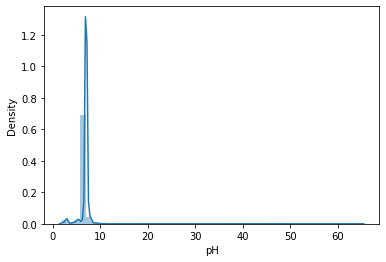

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


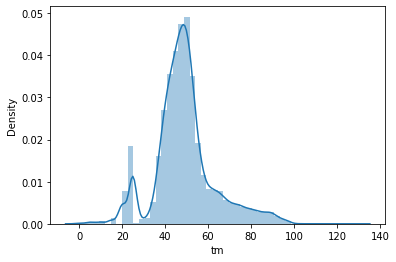

In [13]:
#############################################################################
# Task
# Plot a dist plot of both the "tm" and "pH" columns on *two separate plots*. 
# Running plt.show() will automatically "show" the current plotted results,
# so use this to break up the two plots 
#############################################################################
import seaborn

seaborn.distplot(df["pH"])
plt.show()
seaborn.distplot(df["tm"])
plt.show()

In [29]:
#############################################################################
# Task
# Create a new column of the dataset called "len_protein" that is the lengths
# of the "protein_sequence" column
# Hint: look at https://stackoverflow.com/questions/37335598/how-to-get-the-length-of-a-cell-value-in-pandas-dataframe 
#############################################################################
# print(len(df['protein_sequence'][2]))
len_protein = df['protein_sequence'].str.len()
df['len_protein'] = len_protein

In [15]:
#############################################################################
# Task
# Check if any empty/nan values exist in the "pH" column
# Hint: https://stackoverflow.com/questions/29530232/how-to-check-if-any-value-is-nan-in-a-pandas-dataframe
#############################################################################
len(df[df['pH'].isnull()])

286

In [ ]:
#############################################################################
# Task
# Replace nan values in the "pH" column with 7. Confirm the previous cell now returns False
# Hint: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
# Important Note! This function *returns a copy*: it does *not* modify the
# original dataframe, so you have to make sure to "overwrite" the current column
#############################################################################
df['pH'] = df['pH'].fillna(7)
df

In [30]:
#############################################################################
# Task
# Let's use "len_protein" and "pH" to try to predict "tm"! Let's start by
# constructing our X matrix, which has entries (len_protein, pH) per row
# and y vector, which is a series of the tm values
# Hint: remember that if you do dataframe[col1, col2, ...], you can convert that
# to a numpy array with .values
#############################################################################
X = df.DataFrame(['len_protein', 'pH']).values
y = df.DataFrame(data=df['tm']).values

AttributeError: ignored

In [26]:
#############################################################################
# Task
# Check the shapes of X and y to confirm they look reasonable
#############################################################################
print(X.shape)
print(y.shape)

AttributeError: ignored

Recall that, in an actual competition (like we're using data from here), the test file won't contain the true values (otherwise it wouldn't be much of a competition...) So, we have to create our own "fake" test set that allows us to do some sort of assessment: this is the idea behind a validation set! So, let's go ahead and split X into train and validation sets.

In [ ]:
#############################################################################
# Task
# Split X and y into train and validation sets, with 30000 and the rest resp.
#############################################################################

In [ ]:
#############################################################################
# Task
# Fit a linear regression to the training data
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
#############################################################################

In [ ]:
#############################################################################
# Task
# Compute your MSE on the validation set
# Hint: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
#############################################################################

In [ ]:
#############################################################################
# Task
# Create a deep learning model (architecture of your choice) that does the 
# above prediction. Fit it with mse using adam for 10 epochs. 
# Evaluate it on the validation set.
#############################################################################

Great! Now we'll do a quick tutorial (time permitting) of OverLeaf and LaTeX: https://www.overleaf.com/